100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


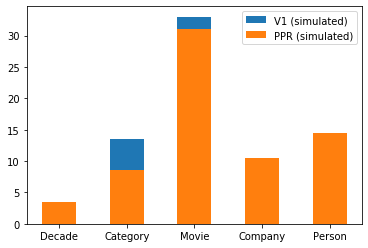

In [10]:
import json
from collections import defaultdict
from functools import reduce
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns

groups = ['Decade', 'Category', 'Movie', 'Company', 'Person']
entities = pd.read_csv(f'../data/entities.csv')
entities.labels = entities.labels.str.split('|')

def get_median_frequencies(df):
    group_user_frequency = defaultdict(list)
    
    for user in tqdm.tqdm(list(set(df.userId))[:10]):
        group_frequency = dict()
        
        for idx, rating in df[df.userId == user].iterrows():
            uri_labels = set(reduce(lambda a, b: a + b, entities[entities.uri == rating.uri].labels))
            
            for group in groups:
                if group in uri_labels:
                    group_frequency[group] = group_frequency.get(group, 0) + 1
                    
        for group, frequency in group_frequency.items():
            group_user_frequency.setdefault(group, []).append(frequency)
    
    return [np.median(group_user_frequency[group]) for group in groups]

width = 0.5
ratings_file = json.load(open('../data/overview.json', 'r'))
for name, file in ratings_file.items():
    plt.bar(groups, get_median_frequencies(pd.read_csv(file)), width=width, label=name)


plt.legend()
plt.savefig('figures/type_frequency.pdf', bbox_inches='tight')
plt.show()
    